# 딥러닝 구조 연습2

## 라이브러리 로드

In [3]:
import pandas as pd
import tensorflow as tf

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 데이터 로드

In [5]:
df = pd.read_csv('./data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 데이터 준비

In [6]:
X_train=df.drop(['Outcome'],axis=1)

In [7]:
y_train=df['Outcome']

In [8]:
type(X_train),type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [14]:
X_train.shape

(768, 8)

## 딥러닝 구성하기

http://alexlenail.me/NN-SVG/index.html

In [20]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12,input_shape=(8,),activation='relu'))
model.add(Dense(1,activation='sigmoid')) # 모델을 만드는 목적 : 이진 분류

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## 딥러닝 설정하기

In [22]:
# 모델을 컴파일합니다.
# 이진분류 loss: binary_crossentropy
# 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])

## 딥러닝 훈련하기

In [23]:
# 모델을 실행합니다.
epoch_hist = model.fit(X_train,y_train,epochs=200)

Epoch 1/200
24/24 [==============================] - 4s 11ms/step - loss: 9.2375 - Accuracy: 0.6523
Epoch 2/200
24/24 [==============================] - 0s 11ms/step - loss: 3.6825 - Accuracy: 0.5378
Epoch 3/200
24/24 [==============================] - 0s 9ms/step - loss: 2.4073 - Accuracy: 0.5456
Epoch 4/200
24/24 [==============================] - 0s 7ms/step - loss: 1.8380 - Accuracy: 0.5534
Epoch 5/200
24/24 [==============================] - 1s 24ms/step - loss: 1.5823 - Accuracy: 0.5742
Epoch 6/200
24/24 [==============================] - 0s 13ms/step - loss: 1.4518 - Accuracy: 0.5898
Epoch 7/200
24/24 [==============================] - 0s 19ms/step - loss: 1.3445 - Accuracy: 0.5898
Epoch 8/200
24/24 [==============================] - 0s 16ms/step - loss: 1.2582 - Accuracy: 0.5977
Epoch 9/200
24/24 [==============================] - 0s 5ms/step - loss: 1.1860 - Accuracy: 0.5990
Epoch 10/200
24/24 [==============================] - 0s 6ms/step - loss: 1.1168 - Accuracy: 0.5951
Epo

## 평가하기

In [24]:
# 결과를 출력합니다.
model.evaluate(X_train,y_train)


24/24 [==============================] - 1s 5ms/step - loss: 0.5313 - Accuracy: 0.7539


[0.5312833786010742, 0.75390625]

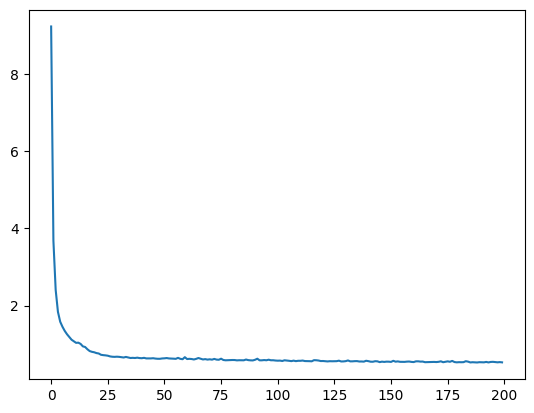

In [25]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'])

## 전체 코드

Epoch 1/200
24/24 [==============================] - 1s 5ms/step - loss: 0.6457 - Accuracy: 0.6471
Epoch 2/200
24/24 [==============================] - 0s 9ms/step - loss: 0.6305 - Accuracy: 0.6484
Epoch 3/200
24/24 [==============================] - 0s 12ms/step - loss: 0.6134 - Accuracy: 0.6562
Epoch 4/200
24/24 [==============================] - 0s 12ms/step - loss: 0.6013 - Accuracy: 0.6615
Epoch 5/200
24/24 [==============================] - 0s 11ms/step - loss: 0.5954 - Accuracy: 0.6719
Epoch 6/200
24/24 [==============================] - 0s 10ms/step - loss: 0.5926 - Accuracy: 0.6732
Epoch 7/200
24/24 [==============================] - 0s 11ms/step - loss: 0.5927 - Accuracy: 0.6719
Epoch 8/200
24/24 [==============================] - 0s 9ms/step - loss: 0.5901 - Accuracy: 0.6758
Epoch 9/200
24/24 [==============================] - 0s 9ms/step - loss: 0.5887 - Accuracy: 0.6784
Epoch 10/200
24/24 [==============================] - 0s 17ms/step - loss: 0.5883 - Accuracy: 0.6797
Epo

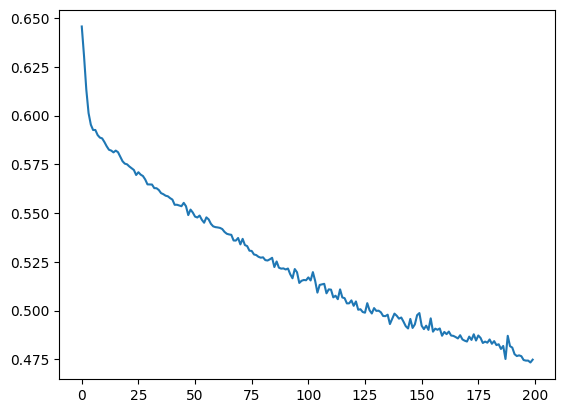

In [41]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('./data/diabetes.csv')

X_train=df.drop(['Outcome'],axis=1)
y_train=df['Outcome']

model = Sequential()
model.add(Dense(12,input_shape=(8,),activation='relu'))
model.add(Dense(12,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])
epoch_hist = model.fit(X_train,y_train,epochs=200)

model.evaluate(X_train,y_train)

plt.plot(epoch_hist.history['loss'])

## 실험

아래의 파라미터를 조정해보며 네트워크의 구성과 성능을 살펴봅시다. 
* Dense층의 유닛개수를 조정해 봅시다. 
* Dense층을 더 넣어 봅시다. 
* epoch수와 batch_size를 조정해 봅시다.